<a href="https://colab.research.google.com/github/shanzabakhtds/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIBRARIES

In [ ]:
# for reshaping arrays and working with numerical data
import numpy as np

#used for working with datasets, offering functions for data analysis, cleaning, exploration, and manipulation
import pandas as pd

#used for pie charts for visualizing results
from matplotlib import pyplot as plt

#for preparing text data for analysis, It's used to create a matrix of word counts from text reviews, allowing the model to work with textual data
from sklearn.feature_extraction.text import CountVectorizer

#For data preprocessing, model training, performance evaluation, and user interaction
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

#used for training a Logistic Regression model for sentiment analysis
from sklearn.linear_model import LogisticRegression

 #used for  applying under-sampling
from imblearn.under_sampling import RandomUnderSampler

#Loading Dataset


In [ ]:
df = pd.read_csv('/IMDB Dataset.csv')



#Exploring The DataSet

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
display(df.head(10))

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
df.describe()  # used to get a descriptive statistics summary of a given dataframe.

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df.info()  #allows us to learn the shape of object types of our data.
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


#Checking the dimension of the dataset



In [ ]:
print("Dimensions of the dataset in (rows, columns): ", df.shape)

Dimensions of the dataset in (rows, columns):  (50000, 2)


#Checking The Coloumn Names in our Dataset

In [ ]:
print("\n Columns Names are : ")
print("  ")
df.columns



 Columns Names are : 
  


Index(['review', 'sentiment'], dtype='object')

# Check the number of values in each column

In [ ]:

df.nunique()

review       49582
sentiment        2
dtype: int64

# Check if dataset is balanced

In [ ]:

df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

#Descriptive statistics


In [ ]:
statistics = df.describe().transpose()
print("\nDescriptive Statistics:")
print(" ")
print(statistics)


Descriptive Statistics:
 
           count unique                                                top  \
review     50000  49582  Loved today's show!!! It was a variety and not...   
sentiment  50000      2                                           positive   

            freq  
review         5  
sentiment  25000  


#**Improving the accuracy of sentiment analysis:**
By combining the rating and content, the sentiment analysis model can have more context to work with, which can lead to more accurate results.

# Combine review title and content for analysis using Random Forest Classifier


In [ ]:
Vectorizer_1 = CountVectorizer()
Model = RandomForestClassifier(n_estimators=100, random_state=42)
x = df['review']
y = df['sentiment']
y.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# Combine review title and content for analysis using Logisticregression

In [ ]:

Vectorizer_1 = CountVectorizer()
Model = LogisticRegression(max_iter = 4000)#     maximum of 4000 iterations during the training process.
x = df['review']
y = df['sentiment']
y.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
# Balance the dataset using under-sampling
reduction_1 = RandomUnderSampler()
y = np.array(y)
x = np.array(x)
y = np.reshape(y, (-1, 1))
x = np.reshape(x, (-1, 1))
x_r, y_r = reduction_1.fit_resample(x, y)
print("Balanced dataset size:", len(y_r))

Balanced dataset size: 50000


In [ ]:
#Balance the dataset using under-sampling
reduction_1 = RandomUnderSampler(random_state=42)
x_r, y_r = reduction_1.fit_resample(x, y)
print("Balanced dataset size:", len(y_r))

Balanced dataset size: 50000


# Split the data into training and testing sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_r,y_r)
X_test = X_test.reshape(-1)
X_train = Vectorizer_1.fit_transform(X_train.reshape(-1))
X_test = Vectorizer_1.transform(X_test)

# Model Training


In [ ]:
Model.fit(X_train, y_train)
result = Model.predict(X_test)

#Confusion Matrix and Accuracy Checking

With the values of TP, TN, FP, and FN, we can calculate various performance metrics like accuracy, precision, recall (sensitivity), specificity, F1-score, and more. These metrics provide a deeper understanding of how well our classification model is performing.

In [ ]:

conf_matrix = confusion_matrix(y_test, result)
accuracy_model = accuracy_score(y_test, result)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy_model)


Confusion Matrix:
[[5478  738]
 [ 667 5617]]

Accuracy: 0.8876


**In the above confusion matrix:**


---


                            [TP   FP
                            FN    TN]

5478 reviews were correctly predicted as positive sentiment True +ve (TP)

738 reviews were incorrectly predicted as positive sentiment False +ve (FP)

667 reviews were incorrectly predicted as negative sentiment False -ve (FN)

5617 reviews were correctly predicted as negative sentiment True -ve (TN)



# Make predictions on sample reviews

In [ ]:

sample_reviews = [
    "Excellent product!",
    "This is probably the best thing I have ever bought",
    "It works fine! Thank you!",
    "Do not buy it. Horrible product",
    "My delivery is 2 months delayed. Pure lack of professionalism",
    "Many disadvantages, I do not recommend it"
]
sample_predictions = Model.predict(Vectorizer_1.transform(sample_reviews))
print("\nSample Predictions:")
print(sample_predictions)


Sample Predictions:
['positive' 'positive' 'positive' 'negative' 'negative' 'positive']


# Get the number of positive and negative reviews from the user

In [ ]:

positive_count = int(input("Enter the number of positive reviews: "))
negative_count = int(input("Enter the number of negative reviews: "))


Enter the number of positive reviews: 50
Enter the number of negative reviews: 50


#Visualization Through Pie Chart

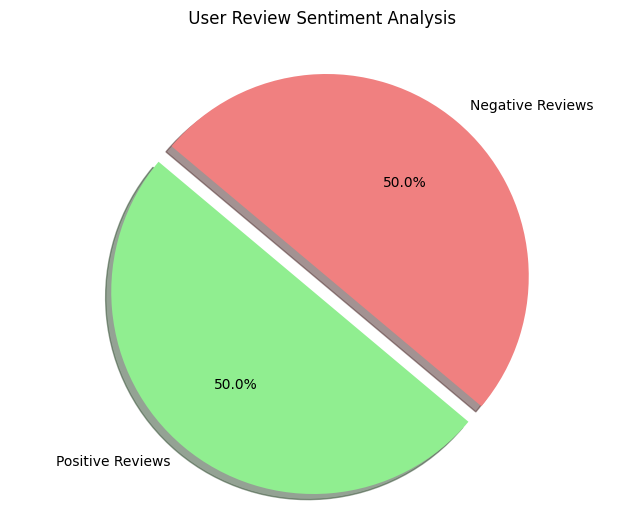

In [ ]:
# Create a figure and axes
plt.figure(figsize=(8, 6))

# Data
labels = ["Positive Reviews", "Negative Reviews"]
sizes = [positive_count, negative_count]
colors = ["lightgreen", "lightcoral"]
explode = (0.1, 0)  # Explode the first slice (Positive Reviews)

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Title
plt.title(" User Review Sentiment Analysis\n  ")
print("\n ")

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
#Display results
print("\nUser Review Analysis:")
print(f"Reviews Positive: {positive_count}")
print(f"Reviews Negative: {negative_count}")
print(f"Note: The presented predictions come with an accuracy of {accuracy_model:.1%}")


User Review Analysis:
Reviews Positive: 50
Reviews Negative: 50
Note: The presented predictions come with an accuracy of 88.8%
